<a href="https://colab.research.google.com/github/WojciechMojsiejuk/OpenSourceSoftwareCourse/blob/main/Exercise09/wdbc_classification_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import (datasets, model_selection, linear_model, naive_bayes, neural_network, neighbors, svm, tree, ensemble)
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

Let's test all known models from previous exerecises

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


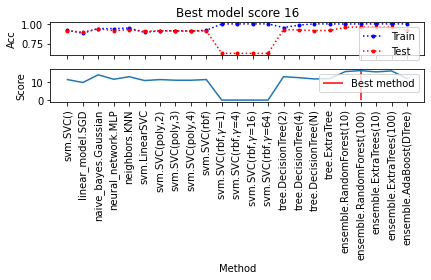

In [2]:
# Load a dataset
wdbc = datasets.load_breast_cancer()

# Train a model
models = [
    {'name': 'svm.SVC()', 'obj': svm.SVC()},
    {'name': 'linear_model.SGD', 'obj': linear_model.SGDClassifier()},
    {'name': 'naive_bayes.Gaussian', 'obj': naive_bayes.GaussianNB()},
    {'name': 'neural_network.MLP', 'obj': neural_network.MLPClassifier()},
    {'name': 'neighbors.KNN', 'obj': neighbors.KNeighborsClassifier()},

    {'name': 'svm.LinearSVC', 'obj': svm.LinearSVC()},
    {'name': 'svm.SVC(poly,2)', 'obj': svm.SVC(kernel='poly', degree=2)},
    {'name': 'svm.SVC(poly,3)', 'obj': svm.SVC(kernel='poly')},
    {'name': 'svm.SVC(poly,4)', 'obj': svm.SVC(kernel='poly', degree=4)},
    {'name': 'svm.SVC(rbf)', 'obj': svm.SVC(kernel='rbf')},
    {'name': 'svm.SVC(rbf,$\gamma$=1)', 'obj': svm.SVC(kernel='rbf', gamma=1)},
    {'name': 'svm.SVC(rbf,$\gamma$=4)', 'obj': svm.SVC(kernel='rbf', gamma=4)},
    {'name': 'svm.SVC(rbf,$\gamma$=16)', 'obj': svm.SVC(kernel='rbf', gamma=16)},
    {'name': 'svm.SVC(rbf,$\gamma$=64)', 'obj': svm.SVC(kernel='rbf', gamma=64)},

    {'name': 'tree.DecisionTree(2)', 'obj': tree.DecisionTreeClassifier(max_depth=2)},
    {'name': 'tree.DecisionTree(4)', 'obj': tree.DecisionTreeClassifier(max_depth=4)},
    {'name': 'tree.DecisionTree(N)', 'obj': tree.DecisionTreeClassifier()},
    {'name': 'tree.ExtraTree', 'obj': tree.ExtraTreeClassifier()},

    {'name': 'ensemble.RandomForest(10)', 'obj': ensemble.RandomForestClassifier(n_estimators=10)},
    {'name': 'ensemble.RandomForest(100)', 'obj': ensemble.RandomForestClassifier()},
    {'name': 'ensemble.ExtraTrees(10)', 'obj': ensemble.ExtraTreesClassifier(10)},
    {'name': 'ensemble.ExtraTrees(100)', 'obj': ensemble.ExtraTreesClassifier()},
    {'name': 'ensemble.AdaBoost(DTree)', 'obj': ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier())},
]
acc_train_list = []
acc_test_list = []
scores = []

for model in models:
    cv_results = model_selection.cross_validate(model['obj'], wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

names = [model['name'] for model in models]

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(models))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Let's see the structure of the dataset

In [3]:
df = pd.DataFrame(wdbc.data)
print(df)

        0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20  

We have 569 samples of 30 features, according to Scikit-learn cheat sheet as we want to predict a category and we have labeled data and number of samples < 100K we should use Linear SVC, but because the performance of it is relatively weak
let's try KNeighbors Classifier with larger number of neighbors

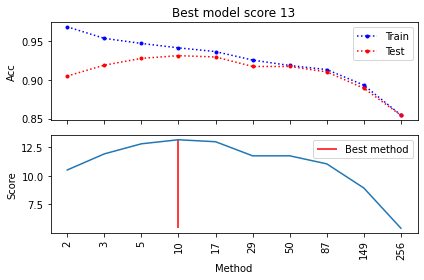

In [4]:
# number of neighbours
K = np.logspace(1, 8, num=10, base=2.0).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for k in K:

    model = neighbors.KNeighborsClassifier(k)
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(K))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, K, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

We achieve highest score with k = 10 neighbours. But our score is still low. We should switch to SVC and Ensemble Classifiers. From the first plot we noticed that SVC didn't perform well with this task, let's then focus on Decision Trees

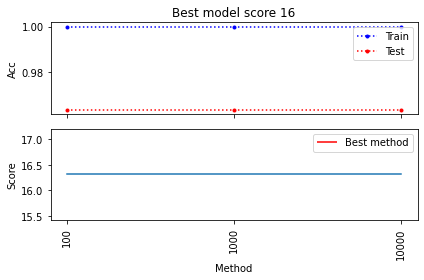

In [6]:
list_of_estimators = np.logspace(2, 4, 3).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for n_estimators in list_of_estimators:
    model = ensemble.ExtraTreesClassifier(n_estimators)
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_estimators, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

As we can see number of estimators doesn't change the performance of this model. It seems it's the maximum of its capabilities. Let;s see if the split criterion affects the performance.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/paralle

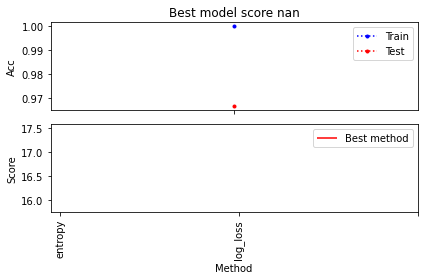

In [10]:
acc_train_list = []
acc_test_list = []
scores = []

list_of_criterions = ['entropy', 'log_loss']

for criterion in list_of_criterions:
    model = ensemble.ExtraTreesClassifier(n_estimators=100, criterion=criterion)
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(acc_train_list, 'b.:', label='Train')
plt.plot(acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_criterions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Let's look at different models. 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

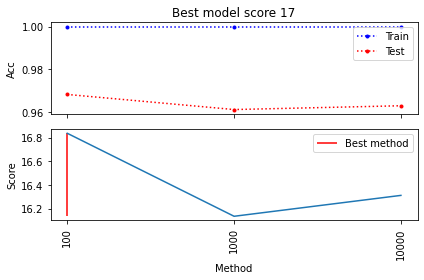

In [11]:
list_of_estimators = np.logspace(2, 4, 3).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for n_estimators in list_of_estimators:
    model = ensemble.AdaBoostClassifier(ensemble.ExtraTreesClassifier(n_estimators))
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_estimators, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

We use AdaBoost meta classifier on top of the ExtraTreesClassifier. Let's expand the search because we might ommit some smaller patterns

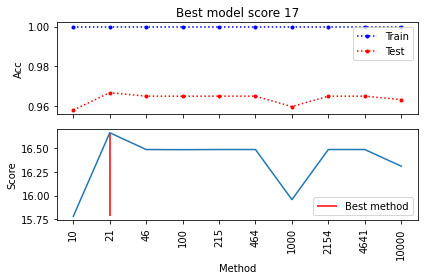

In [12]:
list_of_estimators = np.logspace(1, 4, 10).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for n_estimators in list_of_estimators:
    model = ensemble.AdaBoostClassifier(ensemble.ExtraTreesClassifier(n_estimators))
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_estimators, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

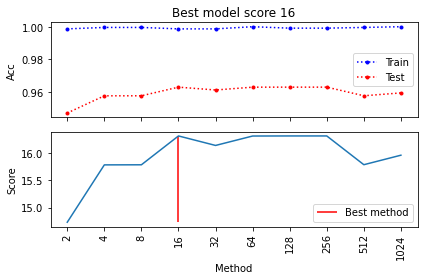

In [15]:
list_of_estimators = np.logspace(1, 10, 10, base=2.0).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for n_estimators in list_of_estimators:
    model = ensemble.BaggingClassifier(ensemble.ExtraTreesClassifier(n_estimators))
    cv_results = model_selection.cross_validate(model, wdbc.data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_estimators, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

No matter what score 16-17 is the maximal we can obtain. Let's try some preprocessing proposed in articles about this dataset

https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

https://www.kaggle.com/code/schmoyote/breast-cancer-classification-beginner-friendly

https://gtraskas.github.io/post/breast_cancer/

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wdbc_scaled_data = sc.fit_transform(wdbc.data)

In [19]:
df = pd.DataFrame(wdbc_scaled_data)
print(df)

           0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

           7         8         9   ...        20        21        22  \
0  

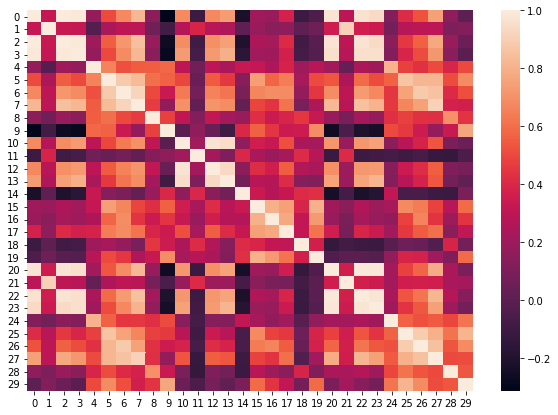

In [20]:
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

In [22]:
# Hyperparameter grid for RandomForest model
rf_grid = {"n_estimators": np.logspace(1, 10, 10, base=2.0).astype(int),
           "max_depth":[None, 3, 5, 10],
           "max_features":["sqrt", "log2", "auto"],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

In [25]:
#Setup random hyperparameter search for RandomForest Classifier

model = model_selection.RandomizedSearchCV(ensemble.ExtraTreesClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               n_jobs=-1,
                               random_state=0)

model.fit(wdbc_scaled_data, wdbc.target)
print(model.best_params_)

{'n_estimators': 64, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10}


In [33]:
model = ensemble.ExtraTreesClassifier(n_estimators=64, min_samples_split=10, min_samples_leaf=5, max_features='log2', max_depth=10)
cv_results = model_selection.cross_validate(model, wdbc_scaled_data, wdbc.target, cv=5, return_train_score=True)

# Evaluate the model
acc_train = np.mean(cv_results['train_score'])
acc_test = np.mean(cv_results['test_score'])
score = max(10 + 100 * (acc_test - 0.9), 0)

print(f'* Accuracy @ training data: {acc_train:.3f}')
print(f'* Accuracy @ test data: {acc_test:.3f}')
print(f'* Your score: {max(10 + 100 * (acc_test - 0.9), 0):.0f}')

* Accuracy @ training data: 0.976
* Accuracy @ test data: 0.954
* Your score: 15


As we can see best fit in the whole dataset doesn't mean good generalization in cross-validation

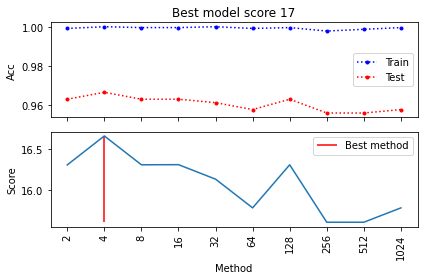

In [34]:
list_of_estimators = np.logspace(1, 10, 10, base=2.0).astype(int)

acc_train_list = []
acc_test_list = []
scores = []

for n_estimators in list_of_estimators:
    model = ensemble.BaggingClassifier(ensemble.ExtraTreesClassifier(n_estimators))
    cv_results = model_selection.cross_validate(model, wdbc_scaled_data, wdbc.target, cv=5, return_train_score=True)

    # Evaluate the model
    acc_train = np.mean(cv_results['train_score'])
    acc_test = np.mean(cv_results['test_score'])
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    score = max(10 + 100 * (acc_test - 0.9), 0)
    scores.append(score)

best_score_idx = np.argmax(scores)

plt.figure()
ax1 = plt.subplot(211)
plt.title(f'Best model score {scores[best_score_idx]:.0f}')

ax1.tick_params(labelbottom=False)
x = range(len(list_of_estimators))
plt.plot(x, acc_train_list, 'b.:', label='Train')
plt.plot(x, acc_test_list, 'r.:', label='Test')
plt.legend()
plt.ylabel('Acc')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(scores)
plt.vlines(best_score_idx, np.min(scores), np.max(scores), 'red', label='Best method')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(x, list_of_estimators, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

It seems to achieve higher accuracy on testing that approx. 97% is highly unlikely.

In [36]:
print(f'* Accuracy @ training data: {acc_train_list[best_score_idx]:.3f}')
print(f'* Accuracy @ test data: {acc_test_list[best_score_idx]:.3f}')
print(f'* Your score: {max(10 + 100 * (acc_test_list[best_score_idx] - 0.9), 0):.0f}')

* Accuracy @ training data: 1.000
* Accuracy @ test data: 0.967
* Your score: 17
